# Euro 2024 Game Shots Analysis Overview

This analysis focuses on breaking down the shooting performance of teams in a selected match. It explores both the quality and location of shots taken during the game and provides visual insights into shooting effectiveness.

## 1. Total Shots Breakdown
For each team, we analyze the total number of shots taken during the match. This includes a breakdown into:
- **On Target Shots**: Shots that were directed towards the goal and either resulted in a goal or were saved.
- **Off Target Shots**: Shots that missed the goal.

This information is visualized in the form of a **donut chart**, showing the proportion of shots that were on and off target for each team.

## 2. Shots Outcome Visualization
Using a pitch map, we visualize where the shots were taken from, with color-coding to indicate the outcome:
- **Green**: Goal (successful shot).
- **Yellow**: Blocked/Saved (on target but not a goal).
- **Red**: Missed (off target).

This graph helps identify shooting patterns and zones from where teams were most dangerous or ineffective.

## 3. Insights and Patterns
By analyzing the data, we can draw conclusions about:
- Which team created more dangerous shooting opportunities.
- The **conversion rate** of shots into goals.
- **Shooting accuracy** for each team based on shot locations and outcomes.

These insights provide a clear picture of the teams' offensive capabilities and how well they executed their goal-scoring chances.


## Import Libraries

In [43]:
from statsbombpy import sb
import pandas as pd
import numpy as np
#from mplsoccer import Pitch
from mplsoccer import VerticalPitch,Pitch
from mplsoccer.pitch import Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import math
import matplotlib.patches as mpatches
import plotly.graph_objects as go
pd.set_option("display.max_columns", None)

### Euro 2024 Competition

In [44]:
#call the statsbombpy API to get a list of matches for a given competition
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,available,2024-07-15T07:54:23.583297,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,available,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,available,2024-07-10T08:51:07.032303,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,available,2024-07-10T06:50:04.068615,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,available,2024-07-12T01:57:15.210934,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


## ETL

In [45]:
#concat home and away teams to keep the unique teams that participated to the tournament
home_team = euro_2024_matches['home_team']
away_team = euro_2024_matches['away_team']
teams = pd.concat([home_team,away_team])
teams = pd.DataFrame(teams.drop_duplicates()).reset_index(drop=True)
teams.columns = ['Team']

In [46]:
# give teams colors for the visuals
team_colors = pd.read_excel('Team Colors.xlsx')
teams = teams.merge(team_colors, how='inner', on='Team')

In [47]:
teams.head()

,Team,First_Color,Second_Color
0,Netherlands,#F36C21,#FFFFFF
1,Spain,#8B0D11,#FCB507
2,Portugal,#E42518,#0D6938
3,Denmark,#FCB507,#FFFFFF
4,England,#000040,#FFFFFF


In [48]:
# take all matches in one dataframe
matches = euro_2024_matches.filter(['match_id','match_date','home_team','away_team','competition_stage','home_score','away_score','period'])
matches['match'] = matches['competition_stage'] + ' ' + matches['home_team'] + ' - ' + matches['away_team'] 

In [49]:
matches

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
0,3942819,2024-07-10,Netherlands,England,Semi-finals,1,2,Semi-finals Netherlands - England
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England
2,3942752,2024-07-09,Spain,France,Semi-finals,2,1,Semi-finals Spain - France
3,3942382,2024-07-06,Netherlands,Turkey,Quarter-finals,2,1,Quarter-finals Netherlands - Turkey
4,3942349,2024-07-05,Portugal,France,Quarter-finals,0,0,Quarter-finals Portugal - France
5,3930180,2024-06-25,Netherlands,Austria,Group Stage,2,3,Group Stage Netherlands - Austria
6,3930171,2024-06-20,Denmark,England,Group Stage,1,1,Group Stage Denmark - England
7,3942227,2024-07-06,England,Switzerland,Quarter-finals,1,1,Quarter-finals England - Switzerland
8,3942226,2024-07-05,Spain,Germany,Quarter-finals,2,1,Quarter-finals Spain - Germany
9,3938645,2024-06-26,Ukraine,Belgium,Group Stage,0,0,Group Stage Ukraine - Belgium


In [50]:
# functions fore retreiving match data

# retrieve the prefered Match ID
def take_matchid(df, value):
    match = df[df['match'] == value]
    if not match.empty:
        return match['match_id'].iloc[0]
    else:
        return None  # or handle it as you need

# select the match that you want 
def teams_selected(df,value):
    df_details = df[df.match == value]
    return df_details

In [51]:
# choose a match from table (matches) and column (match)
match_selector = 'Final Spain - England'

In [52]:
# call the statsbombpy events API to bring in the event data for the match using the function and the string match_selector
match = sb.events(match_id=take_matchid(matches,match_selector))

In [53]:
match.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50aa204f-5d65-4145-8597-5d5628fb7898,1,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2,2,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[54d78bfa-4146-42bd-acdc-97bcd393dd81],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[d2126e70-9f04-4bb7-ba2b-9377836d1757],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7230470a-8ceb-4eb8-a66f-d72a2afb12d6,1706,NaN,NaN,NaN,3943043,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,79,Spain,772,[cb9ba06c-a673-448d-ab21-755d330fcadc],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [54]:
# retieve the general info of the match using again the other function and the match selector
match_details = teams_selected(matches,match_selector)

In [55]:
match_details

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England


In [69]:
# keep only the necessary columns
shots = match[['team', 'type', 'minute', 'location', 'shot_end_location', 'shot_outcome', 'player']]
shots

,team,type,minute,location,shot_end_location,shot_outcome,player
0,Spain,Starting XI,0,NaN,NaN,NaN,NaN
1,England,Starting XI,0,NaN,NaN,NaN,NaN
2,England,Half Start,0,NaN,NaN,NaN,NaN
3,Spain,Half Start,0,NaN,NaN,NaN,NaN
4,England,Half Start,45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3307,England,Shield,67,"[2.5, 9.9]",NaN,NaN,Jude Bellingham
3308,England,Tactical Shift,69,NaN,NaN,NaN,NaN
3309,England,Tactical Shift,89,NaN,NaN,NaN,NaN
3310,Spain,Tactical Shift,89,NaN,NaN,NaN,NaN


In [57]:
shots.player.unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Unai Simón Mendibil',
       'Robin Aime Robert Le Normand', 'Daniel Carvajal Ramos',
       'Álvaro Borja Morata Martín', 'Daniel Olmo Carvajal',
       'Jude Bellingham', 'Rodrigo Hernández Cascante', 'Aymeric Laporte',
       'Luke Shaw', 'Declan Rice', 'Marc Guehi', 'Phil Foden',
       'Kyle Walker', 'Lamine Yamal Nasraoui Ebana',
       'Marc Cucurella Saseta', 'Nicholas Williams Arthuer', 'Harry Kane',
       'Bukayo Saka', 'Fabián Ruiz Peña', 'John Stones',
       'Martín Zubimendi Ibáñez', 'Cole Palmer', 'Mikel Oyarzabal Ugarte',
       'José Ignacio Fernández Iglesias', 'Ollie Watkins', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

In [70]:
# filter and keep only the shots
shots = shots[shots['type'].isin(['Shot'])]
shots

,team,type,minute,location,shot_end_location,shot_outcome,player
3228,Spain,Shot,11,"[115.6, 28.4]","[116.0, 29.3]",Blocked,Nicholas Williams Arthuer
3229,Spain,Shot,12,"[112.9, 36.2]","[120.0, 29.8, 0.5]",Off T,Robin Aime Robert Le Normand
3230,England,Shot,16,"[96.2, 40.8]","[98.5, 40.8]",Blocked,Declan Rice
3231,Spain,Shot,27,"[101.2, 49.8]","[117.9, 42.7, 1.5]",Saved,Fabián Ruiz Peña
3232,Spain,Shot,34,"[95.0, 31.2]","[110.3, 34.7]",Blocked,Daniel Olmo Carvajal
3233,Spain,Shot,42,"[113.9, 30.2]","[114.3, 30.9]",Blocked,Álvaro Borja Morata Martín
3234,England,Shot,44,"[102.6, 36.7]","[104.4, 36.9]",Blocked,Harry Kane
3235,England,Shot,45,"[114.4, 29.9]","[118.9, 36.8, 0.5]",Saved,Phil Foden
3236,Spain,Shot,46,"[109.9, 28.0]","[120.0, 42.4, 0.2]",Goal,Nicholas Williams Arthuer
3237,Spain,Shot,48,"[108.8, 32.1]","[120.0, 49.3, 0.1]",Off T,Daniel Olmo Carvajal


In [71]:
# dataframes per team
shots_home = shots[shots['team'] == str(match_details['home_team'].iloc[0])].reset_index()
shots_away = shots[shots['team'] == str(match_details['away_team'].iloc[0])].reset_index()

In [60]:
shots_home.shot_outcome.unique()

array(['Blocked', 'Off T', 'Saved', 'Goal', 'Wayward'], dtype=object)

In [72]:
# find home team's shot location
shots_Loc_home = shots_home['location']
shots_Loc_home = pd.DataFrame(shots_Loc_home.to_list(), columns=['x', 'y'])
shots_Loc_home

,x,y
0,115.6,28.4
1,112.9,36.2
2,101.2,49.8
3,95.0,31.2
4,113.9,30.2
5,109.9,28.0
6,108.8,32.1
7,95.8,46.1
8,110.9,51.0
9,97.2,43.4


In [73]:
# find away team's shot location
shots_Loc_away = shots_away['location']
shots_Loc_away = pd.DataFrame(shots_Loc_away.to_list(), columns=['x', 'y'])
shots_Loc_away

,x,y
0,96.2,40.8
1,102.6,36.7
2,114.4,29.9
3,99.0,37.2
4,91.0,40.1
5,98.4,49.0
6,109.5,44.1
7,114.8,35.5
8,113.1,41.4


In [74]:
# unique outcome
shots_home.shot_outcome.unique()

array(['Blocked', 'Off T', 'Saved', 'Goal', 'Wayward'], dtype=object)

## Shots Outcome Visualization

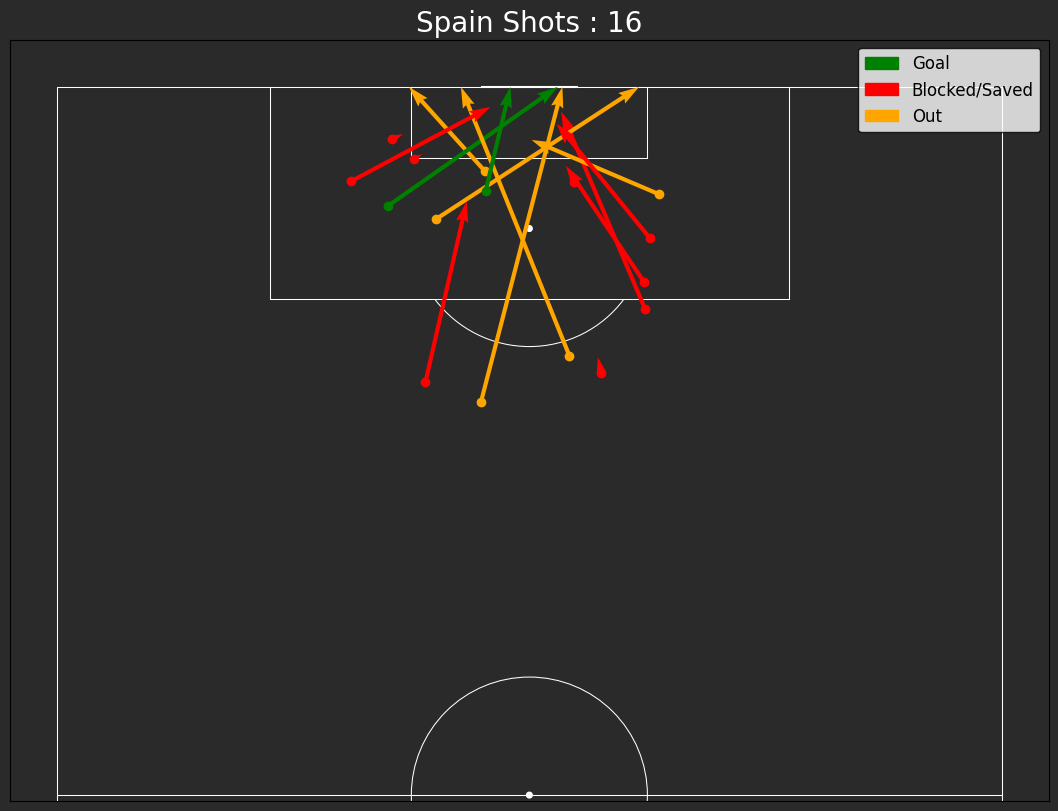

In [75]:
# Create the figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(13.5, 8), constrained_layout=True)

# Set up the pitch (without orientation) with a background color that matches the pitch
pitch_color = '#2a2a2a'  # Same color as the pitch
line_color = '#c7d5cc'   # Pitch lines color
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    half=True, 
    pitch_color='#2a2a2a', 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

# Draw the pitch on the axes
pitch.draw(ax=ax)



# Plot shots with different outcomes (Goal, Blocked, Saved, Other)
for i in range(len(shots_home)):
    if shots_home.shot_outcome[i] == 'Goal':
        pitch.arrows(shots_home.location[i][0], shots_home.location[i][1], shots_home.shot_end_location[i][0], shots_home.shot_end_location[i][1], ax=ax, color='green', width=3)
        pitch.scatter(shots_home.location[i][0], shots_home.location[i][1], ax=ax, color='green', alpha=1)
    elif shots_home.shot_outcome[i] in ['Blocked', 'Saved']:
        pitch.arrows(shots_home.location[i][0], shots_home.location[i][1], shots_home.shot_end_location[i][0], shots_home.shot_end_location[i][1], ax=ax, color='red', width=3)
        pitch.scatter(shots_home.location[i][0], shots_home.location[i][1], ax=ax, color='red', alpha=1)
    else:
        pitch.arrows(shots_home.location[i][0], shots_home.location[i][1], shots_home.shot_end_location[i][0], shots_home.shot_end_location[i][1], ax=ax, color='orange', width=3)
        pitch.scatter(shots_home.location[i][0], shots_home.location[i][1], ax=ax, color='orange', alpha=1)


#title
ax.set_title(f"{str(match_details['home_team'].iloc[0])} Shots : {str(len(shots_home))}", 
             size=20, color='white')
# Remove tick numbers around the pitch
ax.set_xticks([])
ax.set_yticks([])

fig.patch.set_facecolor(pitch_color)


# Add legend as before
goal_patch = mpatches.Patch(color='green', label='Goal')
blocked_patch = mpatches.Patch(color='red', label='Blocked/Saved')
other_patch = mpatches.Patch(color='orange', label='Out')
ax.legend(handles=[goal_patch, blocked_patch, other_patch], loc='upper right', fontsize=12, facecolor='white', edgecolor='black')

# Show the plot
plt.show()


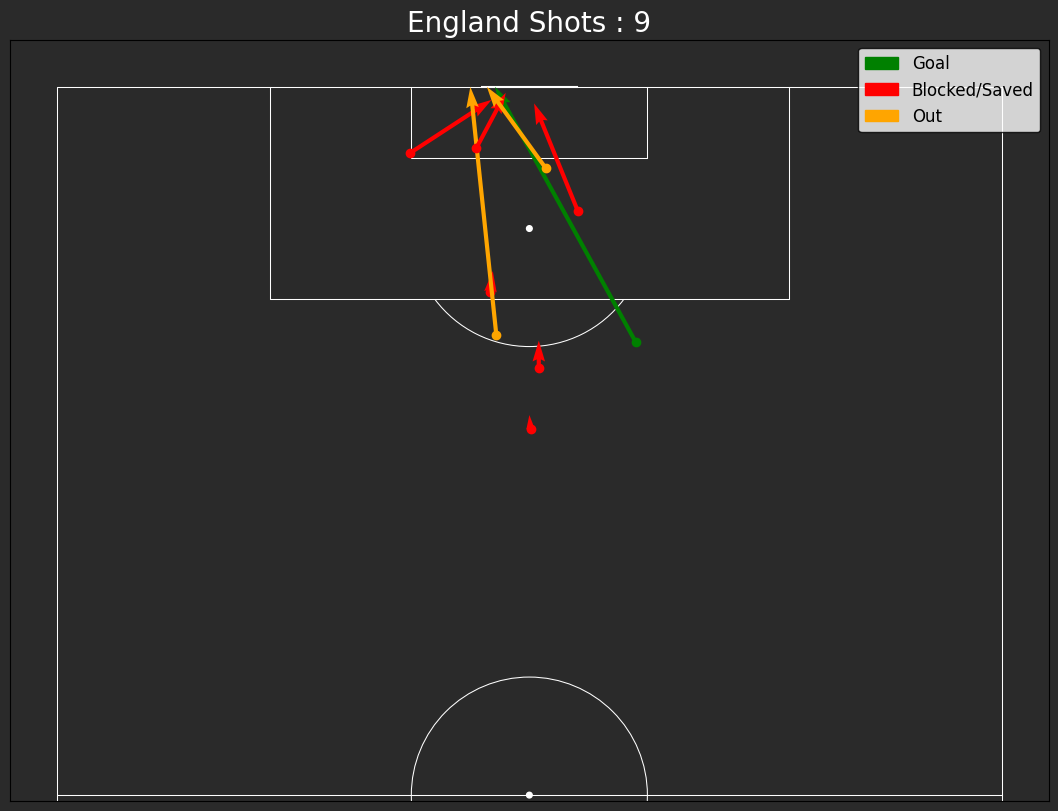

In [76]:
# Create the figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(13.5, 8), constrained_layout=True)

# Set up the pitch (without orientation) with a background color that matches the pitch
pitch_color = '#2a2a2a'  # Same color as the pitch
line_color = '#c7d5cc'   # Pitch lines color
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    half=True, 
    pitch_color='#2a2a2a', 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

# Draw the pitch on the axes
pitch.draw(ax=ax)



# Plot shots with different outcomes (Goal, Blocked, Saved, Other)
for i in range(len(shots_away)):
    if shots_away.shot_outcome[i] == 'Goal':
        pitch.arrows(shots_away.location[i][0], shots_away.location[i][1], shots_away.shot_end_location[i][0], shots_away.shot_end_location[i][1], ax=ax, color='green', width=3)
        pitch.scatter(shots_away.location[i][0], shots_away.location[i][1], ax=ax, color='green', alpha=1)
    elif shots_away.shot_outcome[i] in ['Blocked', 'Saved']:
        pitch.arrows(shots_away.location[i][0], shots_away.location[i][1], shots_away.shot_end_location[i][0], shots_away.shot_end_location[i][1], ax=ax, color='red', width=3)
        pitch.scatter(shots_away.location[i][0], shots_away.location[i][1], ax=ax, color='red', alpha=1)
    else:
        pitch.arrows(shots_away.location[i][0], shots_away.location[i][1], shots_away.shot_end_location[i][0], shots_away.shot_end_location[i][1], ax=ax, color='orange', width=3)
        pitch.scatter(shots_away.location[i][0], shots_away.location[i][1], ax=ax, color='orange', alpha=1)


#title
ax.set_title(f"{str(match_details['away_team'].iloc[0])} Shots : {str(len(shots_away))}", 
             size=20, color='white')
# Remove tick numbers around the pitch
ax.set_xticks([])
ax.set_yticks([])

fig.patch.set_facecolor(pitch_color)


# Add legend as before
goal_patch = mpatches.Patch(color='green', label='Goal')
blocked_patch = mpatches.Patch(color='red', label='Blocked/Saved')
other_patch = mpatches.Patch(color='orange', label='Out')
ax.legend(handles=[goal_patch, blocked_patch, other_patch], loc='upper right', fontsize=12, facecolor='white', edgecolor='black')

# Show the plot
plt.show()


In [77]:
shots_home

,index,team,type,minute,location,shot_end_location,shot_outcome,player
0,3228,Spain,Shot,11,"[115.6, 28.4]","[116.0, 29.3]",Blocked,Nicholas Williams Arthuer
1,3229,Spain,Shot,12,"[112.9, 36.2]","[120.0, 29.8, 0.5]",Off T,Robin Aime Robert Le Normand
2,3231,Spain,Shot,27,"[101.2, 49.8]","[117.9, 42.7, 1.5]",Saved,Fabián Ruiz Peña
3,3232,Spain,Shot,34,"[95.0, 31.2]","[110.3, 34.7]",Blocked,Daniel Olmo Carvajal
4,3233,Spain,Shot,42,"[113.9, 30.2]","[114.3, 30.9]",Blocked,Álvaro Borja Morata Martín
5,3236,Spain,Shot,46,"[109.9, 28.0]","[120.0, 42.4, 0.2]",Goal,Nicholas Williams Arthuer
6,3237,Spain,Shot,48,"[108.8, 32.1]","[120.0, 49.3, 0.1]",Off T,Daniel Olmo Carvajal
7,3238,Spain,Shot,54,"[95.8, 46.1]","[97.1, 45.8]",Blocked,Álvaro Borja Morata Martín
8,3239,Spain,Shot,54,"[110.9, 51.0]","[115.5, 40.2]",Wayward,Álvaro Borja Morata Martín
9,3240,Spain,Shot,55,"[97.2, 43.4]","[120.0, 34.2, 0.2]",Off T,Nicholas Williams Arthuer


## Shots Breakdown Donut Chart

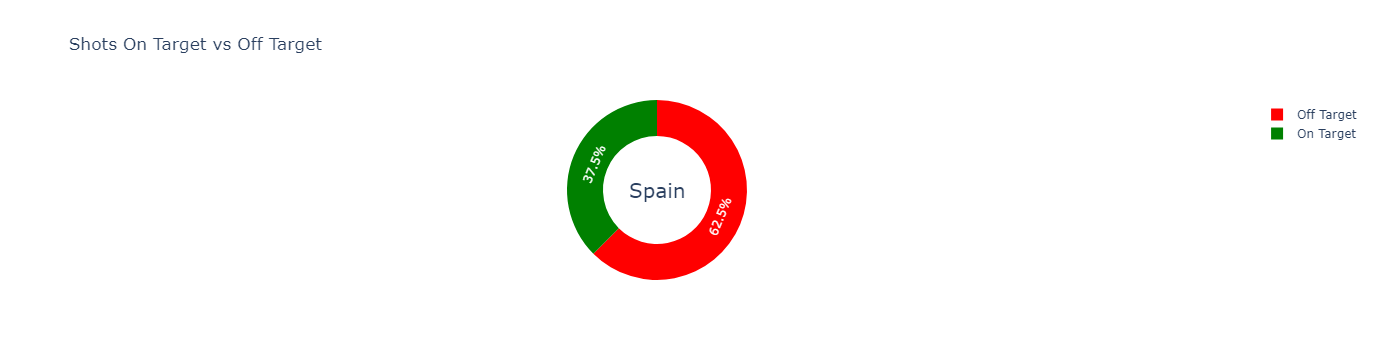

In [78]:
# donut chart for shots on and off target

# Team name
team_name = shots_home['team'].iloc[0]
num_shots = len(shots_home)

# Display the team name and the number of shots
#st.write(f"**{team_name} Shots: {num_shots}**")

# Calculate the number of shots on target and off target
on_target = shots_home[shots_home['shot_outcome'].isin(['Goal', 'Saved'])].shape[0]
off_target = shots_home[~shots_home['shot_outcome'].isin(['Goal', 'Saved'])].shape[0]

# Pie chart for shots distribution (On Target vs Off Target)
labels = ['On Target', 'Off Target']
values = [on_target, off_target]
colors = ['green', 'red']

# Create a donut chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, marker=dict(colors=colors))])

# Update layout for donut chart
fig.update_layout(
    title_text="Shots On Target vs Off Target",
    annotations=[dict(text=f'{team_name}', x=0.5, y=0.5, font_size=20, showarrow=False)],
    showlegend=True
)

fig.show()

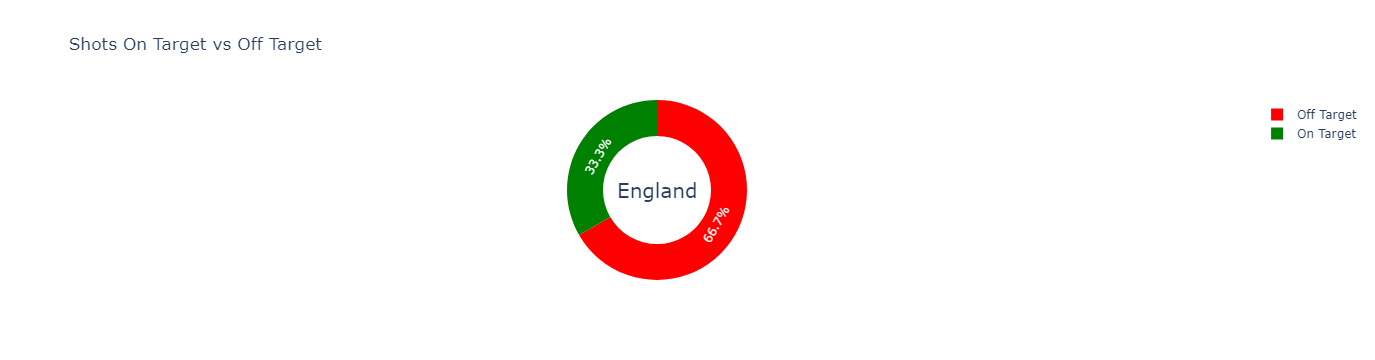

In [79]:
# donut chart for shots on and off target

team_name = shots_away['team'].iloc[0]
num_shots = len(shots_away)

# Display the team name and the number of shots
#st.write(f"**{team_name} Shots: {num_shots}**")

# Calculate the number of shots on target and off target
on_target = shots_away[shots_away['shot_outcome'].isin(['Goal', 'Saved'])].shape[0]
off_target = shots_away[~shots_away['shot_outcome'].isin(['Goal', 'Saved'])].shape[0]

# Pie chart for shots distribution (On Target vs Off Target)
labels = ['On Target', 'Off Target']
values = [on_target, off_target]
colors = ['green', 'red']

# Create a donut chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, marker=dict(colors=colors))])

# Update layout for donut chart
fig.update_layout(
    title_text="Shots On Target vs Off Target",
    annotations=[dict(text=f'{team_name}', x=0.5, y=0.5, font_size=20, showarrow=False)],
    showlegend=True
)

fig.show()